<a href="https://colab.research.google.com/github/sjd1365/learn/blob/main/Synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Install catboost if not already installed
try:
    from catboost import CatBoostRegressor
except ModuleNotFoundError:
    !pip install catboost
    from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving medical_regression_dataset.xlsx to medical_regression_dataset.xlsx


In [7]:
df = pd.read_excel('medical_regression_dataset.xlsx')

## Data Undertanding


In [10]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose,Disease_Risk
0,60,20.4,125,212,127,13.52
1,26,32.9,159,172,178,17.72
2,25,22.8,154,156,120,19.07
3,64,30.0,118,264,141,24.83
4,20,34.7,110,258,157,20.18


In [11]:
df.shape

(300, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   BMI             300 non-null    float64
 2   Blood_Pressure  300 non-null    int64  
 3   Cholesterol     300 non-null    int64  
 4   Glucose         300 non-null    int64  
 5   Disease_Risk    300 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 14.2 KB


In [13]:
np.sum(df.isnull(), axis = 0)

,0
Age,0
BMI,0
Blood_Pressure,0
Cholesterol,0
Glucose,0
Disease_Risk,0


In [14]:
np.sum(df.duplicated(), axis = 0)

np.int64(0)

In [15]:
df.describe()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose,Disease_Risk
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,51.670000,29.128333,136.193333,228.126667,134.213333,20.779200
std,17.423923,6.302107,26.198163,42.759387,37.257952,3.881847
min,20.000000,18.100000,90.000000,150.000000,70.000000,11.810000
25%,37.000000,23.600000,113.000000,188.750000,101.000000,18.055000
50%,52.000000,29.200000,136.500000,230.000000,133.000000,20.405000
75%,66.250000,34.625000,158.000000,265.250000,167.000000,23.715000
max,80.000000,40.000000,180.000000,300.000000,200.000000,30.860000


In [16]:
x = df.drop('Disease_Risk', axis = 1)
y = df['Disease_Risk']

##DEFINE X,Y ANDSPLIT TEST/TRAIN

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

MODEL EVALUATION FUNCTIONS

In [22]:
def evaluate_model(model, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': name,
        'MAE': round (mae, 2),
        'MSE': round (mse, 2),
        'RMSE': rmse,
        'R2': round (r2,3)
    }

##TRAINING MODELS

In [25]:
results = []
results.append(evaluate_model(LinearRegression(), 'Linear Regression'))
results.append(evaluate_model(Ridge(), 'Ridge'))
results.append(evaluate_model(Lasso(), 'Lasso'))
results.append(evaluate_model(ElasticNet(), 'ElasticNet'))
results.append(evaluate_model(RandomForestRegressor(), 'Random Forest'))
results.append(evaluate_model(GradientBoostingRegressor(), 'Gradient Boosting'))
results.append(evaluate_model(DecisionTreeRegressor(), 'Decision Tree'))
results.append(evaluate_model(KNeighborsRegressor(), 'K-Neighbors'))


##final comparison models

In [26]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='R2', ascending=False)

,Model,MAE,MSE,RMSE,R2
2,Lasso,2.54,8.77,2.961629,0.299
3,ElasticNet,2.54,8.82,2.969089,0.296
1,Ridge,2.56,8.93,2.987688,0.287
0,Linear Regression,2.56,8.93,2.987735,0.287
4,Random Forest,2.84,11.18,3.342956,0.107
5,Gradient Boosting,2.95,12.44,3.526991,0.006
7,K-Neighbors,3.57,16.96,4.118088,-0.355
6,Decision Tree,3.89,21.41,4.626621,-0.710


In [27]:
df.columns


Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose',
       'Disease_Risk'],
      dtype='object')

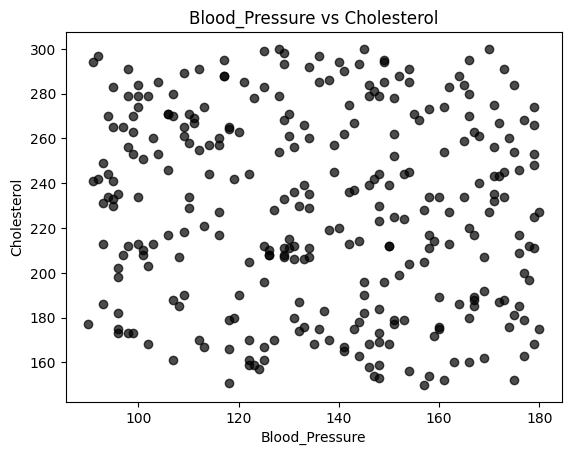

In [30]:
# Use the existing dataframe 'list' and valid numeric columns for plotting
plt.scatter(df['Blood_Pressure'], df['Cholesterol'], c='black', alpha=0.7)
plt.xlabel('Blood_Pressure')
plt.ylabel('Cholesterol')
plt.title('Blood_Pressure vs Cholesterol')
plt.show()

In [32]:
print('Type X is: ',type(x))
print('Type y is: ',type(y))

Type X is:  <class 'pandas.core.frame.DataFrame'>
Type y is:  <class 'pandas.core.series.Series'>


In [72]:
x_train.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose
232,68,23.6,131,180,71
59,55,33.5,161,152,98
6,42,36.6,167,217,81
185,70,29.9,136,285,198
173,70,22.0,112,170,167


##FEATURE IMPORTANCE(RANDOM FOREST)

In [37]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
importances = pd.DataFrame({'feature': x_train.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
importances

,feature,importance
1,BMI,0.575207
4,Glucose,0.120288
3,Cholesterol,0.112019
2,Blood_Pressure,0.104568
0,Age,0.087918


##  Preprocessing – Scaling the features

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(x_train)
X_train        = pd.DataFrame(X_train_scaled)

X_test_scaled  = scaler.fit_transform(x_test)
X_test         = pd.DataFrame(X_test_scaled)

In [40]:
X_train

,0,1,2,3,4
0,0.800000,0.251142,0.455556,0.194631,0.007692
1,0.583333,0.703196,0.788889,0.006711,0.215385
2,0.366667,0.844749,0.855556,0.442953,0.084615
3,0.833333,0.538813,0.511111,0.899329,0.984615
4,0.833333,0.178082,0.244444,0.127517,0.746154
...,...,...,...,...,...
235,0.850000,0.557078,0.122222,0.671141,0.023077
236,0.366667,0.726027,0.444444,0.738255,1.000000
237,0.783333,0.716895,0.222222,0.523490,0.207692
238,0.083333,0.945205,0.311111,0.765101,0.684615


##  Fit & Predict the Model and check the error rate for different K Values

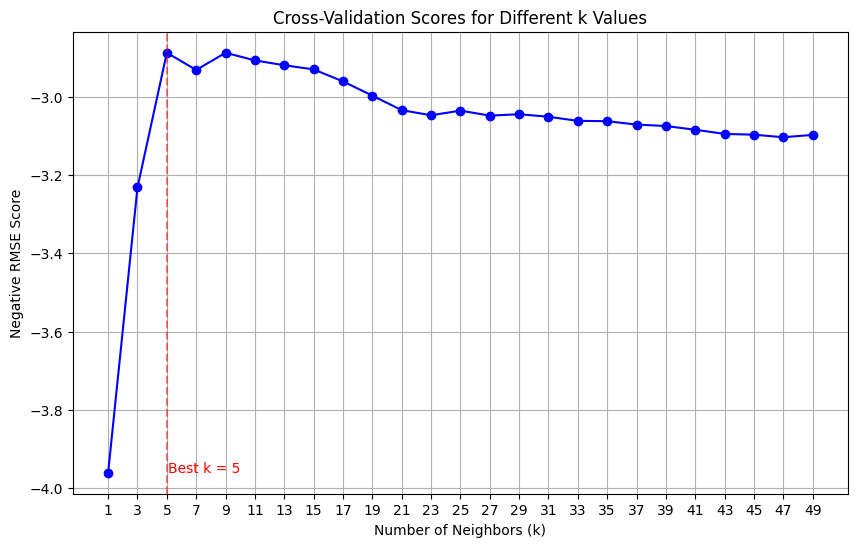

Best k value: 5 with score: -2.8876729741614744


In [43]:
from sklearn.model_selection import cross_val_score

k = [i for i in range(1, 50,2)]  # Example: testing k from 1 to 49 with stepsize 2

# Initialize dictionary to store CV scores
CV = {}

# Loop through each k value
for i in k:  # Start from 1 instead of 0
    KNN = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='minkowski', p=2)

    # K-fold cross validation
    scores = cross_val_score(estimator=KNN, X=X_train, y=y_train,
                            scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

    # Calculate the average scores and save the results
    CV[i] = scores.mean()

# Convert CV dictionary to lists for plotting
k_values = [key for key in CV.keys()]
cv_scores = [value for value in CV.values()]

# Plot the CV scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Negative RMSE Score')
plt.grid(True)
plt.xticks(k_values)

# Find and mark the best k value
best_k = k_values[np.argmax(cv_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.5)
plt.text(best_k+0.1, min(cv_scores), f'Best k = {best_k}', color='red')

plt.show()

print(f"Best k value: {best_k} with score: {CV[best_k]}")

In [44]:
cv_scores


[np.float64(-3.960289138993258),
 np.float64(-3.2317399189200757),
 np.float64(-2.8876729741614744),
 np.float64(-2.9317740492182933),
 np.float64(-2.8878192723286813),
 np.float64(-2.9072907188722326),
 np.float64(-2.919624759717306),
 np.float64(-2.930291378497556),
 np.float64(-2.9608730694842436),
 np.float64(-2.9972348376765146),
 np.float64(-3.0343561864607524),
 np.float64(-3.047391236720512),
 np.float64(-3.035585863096356),
 np.float64(-3.048265258611702),
 np.float64(-3.0447242449613867),
 np.float64(-3.0511942876455795),
 np.float64(-3.061708845036712),
 np.float64(-3.062473776583483),
 np.float64(-3.07117312854368),
 np.float64(-3.0748802324733147),
 np.float64(-3.0843728461296953),
 np.float64(-3.0950607226860236),
 np.float64(-3.096991478029975),
 np.float64(-3.1035878238891472),
 np.float64(-3.0975262498620615)]

## Build KNN model for regression

In [47]:
# Build KNN regressor
KNN = KNeighborsRegressor(n_neighbors=best_k,weights = 'uniform',metric = 'minkowski',p=2)

# Fit the model on train
KNN.fit(X_train, y_train)

# Predict test data
Test_Prediction=KNN.predict(X_test)

In [48]:
Results = pd.DataFrame({'MSE': metrics.mean_squared_error(y_test, Test_Prediction),
                        'RMSE': np.sqrt(metrics.mean_squared_error(y_test, Test_Prediction)),
                        'MAPE': metrics.mean_absolute_percentage_error(y_test, Test_Prediction),
                        'MAE' : metrics.mean_absolute_error(y_test, Test_Prediction),
                        'R^2' : metrics.r2_score(y_test, Test_Prediction)},
                       index = ['KNN - K-fold'])
Results

,MSE,RMSE,MAPE,MAE,R^2
KNN - K-fold,9.957577,3.155563,0.127016,2.697733,0.204455


##  Implementing GridsearchCV

In [50]:


param_grid = {
    'n_neighbors': [i for i in range(1, 50, 2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, param_grid, cv=5)
model1.fit(X_train, y_train)
model1.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

In [51]:
KNN2 = KNeighborsRegressor(n_neighbors=model1.best_params_['n_neighbors'],
                          metric=model1.best_params_['metric'],
                          weights=model1.best_params_['weights'])

KNN2.fit(X_train, y_train)

Test_prediction=KNN2.predict(X_test)

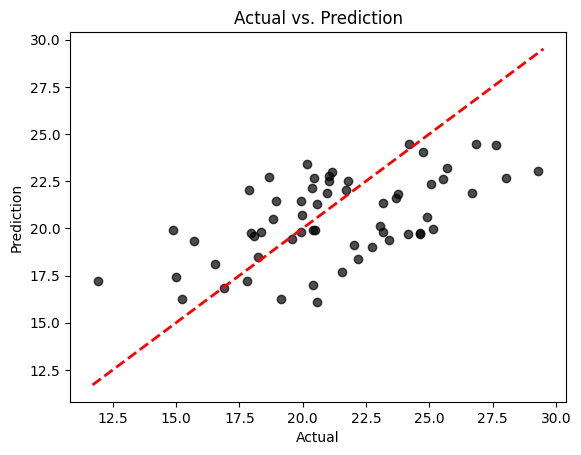

In [52]:
#Plot actual vs. prediction - Test
plt.scatter(y_test, Test_prediction, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min() - 0.2, y_test.max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 2, linestyle='--')
plt.show()

## EDA
### Univariate Analysis

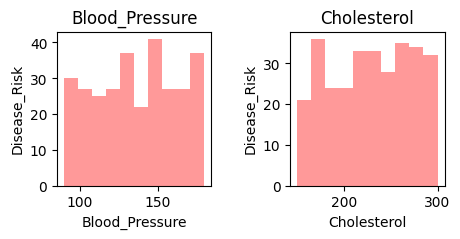

In [54]:
Numeric_features = [2, 3]

plt.figure(figsize = (5, 2))
plt.subplots_adjust(hspace = 0.5, wspace = 0.51)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(1, 2, i)
    plt.hist(x = df.iloc[: , Numeric_features[i - 1]], alpha = 0.4, color = 'red')
    plt.title(df.columns[Numeric_features[i - 1]])
    plt.xlabel(df.columns[Numeric_features[i - 1]])
    plt.ylabel("Disease_Risk")
plt.show()

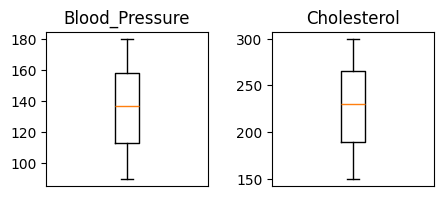

In [55]:
#Boxplot of numeric variables
plt.figure(figsize = (5, 2))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(1, 2, i)
    plt.boxplot(df.iloc[: , Numeric_features[i - 1]])
    plt.xticks([]) #remove the xticks
    plt.title(df.columns[Numeric_features[i - 1]])

plt.show()

In [57]:
df['Disease_Risk'].value_counts()

,count
Disease_Risk,
23.76,3
19.94,3
20.69,2
21.77,2
18.56,2
...,...
16.38,1
20.05,1
19.19,1


### Bivariate Analysis

In [58]:
#Correlation analysis
round(df.iloc[:, Numeric_features].corr(method = 'pearson'), 2)

,Blood_Pressure,Cholesterol
Blood_Pressure,1.0,-0.1
Cholesterol,-0.1,1.0


In [60]:
df.columns

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose',
       'Disease_Risk'],
      dtype='object')

## SVM for classification

In [63]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.svm import SVR

Model_1 = SVR(kernel="linear")
Model_1.fit(X_train, y_train)

SVR(kernel='linear')

In [66]:
# Predict train set
y_train_prediction_1 = Model_1.predict(X_train)
y_train_prediction_1

array([16.96051662, 21.30951289, 23.13351741, 23.28938437, 17.26549488,
       15.98887675, 24.76698236, 26.38442717, 22.54528842, 18.55034056,
       16.00104161, 19.29568364, 21.32084752, 15.95616133, 16.28232614,
       16.58671881, 17.46000685, 20.45379651, 17.04764289, 19.96417251,
       24.52718135, 19.53759065, 20.36752472, 19.93603352, 22.82238646,
       20.86236502, 16.94899114, 21.40423693, 20.3974822 , 18.78300483,
       18.32578191, 24.14320224, 18.06325615, 19.31911467, 22.05884169,
       23.29578491, 20.82455359, 17.3970438 , 21.78566815, 20.37735972,
       21.83995517, 19.28223896, 15.96514018, 16.04933223, 21.35100029,
       16.38531071, 24.40085163, 22.73928594, 20.85136472, 19.47267201,
       22.1382142 , 23.67733933, 24.90147423, 20.84962848, 20.18557689,
       23.99580098, 25.94777111, 20.06794355, 18.50437873, 16.77023334,
       17.47036377, 20.92392932, 23.72445099, 19.88322494, 16.99905415,
       18.89320205, 17.39677755, 17.945066  , 17.9347615 , 22.13

In [68]:
# Predict test set using Model_1 (SVR)
y_test_prediction_1 = Model_1.predict(X_test)

# Evaluate the SVR model using regression metrics
svr_metrics = {
    'Model': 'SVR',
    'MAE': round(metrics.mean_absolute_error(y_test, y_test_prediction_1), 2),
    'MSE': round(metrics.mean_squared_error(y_test, y_test_prediction_1), 2),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction_1)),
    'R2': round(metrics.r2_score(y_test, y_test_prediction_1), 3)
}

print("\nRegression Metrics for SVR (Test Set):")
for key, value in svr_metrics.items():
    print(f"{key}: {value}")

# You can also add this to your results_df if needed, for comparison
# results.append(svr_metrics)
# results_df = pd.DataFrame(results)
# results_df.sort_values(by='R2', ascending=False)


Regression Metrics for SVR (Test Set):
Model: SVR
MAE: 2.65
MSE: 9.42
RMSE: 3.0698421043660074
R2: 0.247


In [69]:
# Predicting test set
y_test_prediction_1 = Model_1.predict(X_test)
y_test_prediction_1

array([24.51290201, 24.6815615 , 19.99006202, 20.04970205, 17.90458075,
       15.99430527, 25.0220526 , 22.49163701, 22.96687811, 19.97829932,
       24.83032184, 24.31721015, 24.3727066 , 15.80263542, 20.51497878,
       20.95727193, 24.69411955, 22.6340723 , 21.83765228, 14.94539938,
       18.01781438, 20.3210239 , 19.63439097, 19.28174055, 16.74276776,
       18.68586657, 21.25726497, 26.34853061, 17.98622858, 18.96098486,
       20.13756914, 19.80136442, 21.77583146, 16.97350678, 22.72295182,
       21.20336708, 16.03820044, 19.04530875, 14.16071903, 24.95973421,
       20.12366675, 21.15731407, 16.65034814, 22.56320042, 18.91918021,
       17.20985988, 22.31927626, 20.88186103, 23.8169051 , 15.61861421,
       19.0391538 , 23.057053  , 23.8825927 , 21.55659993, 21.94434962,
       20.31574663, 19.66785793, 22.21306311, 24.11423065, 22.8094774 ])

In [71]:
# Model evaluation on test - model 1
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_prediction_1)
mse = mean_squared_error(y_test, y_test_prediction_1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_prediction_1)

Results = pd.DataFrame({'MAE': round(mae, 2),
                        'MSE': round(mse, 2),
                        'RMSE': round(rmse, 2),
                        'R2': round(r2, 3)},
                       index = ['SVM - Tuned'])

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247


### Grid search for parameter tuning



In [73]:
10 ** np.linspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR # Ensure SVR is imported if not already

params = {'kernel':['linear','poly'],
          'degree': [2,3,4],
          'C': 10 ** np.linspace(-3, 3, 7)}

svr = SVR() # Changed SVC() to SVR()

model_search = GridSearchCV(svr, params, cv=5)
model_search.fit(X_train, y_train)
model_search.best_params_

{'C': np.float64(0.1), 'degree': 2, 'kernel': 'linear'}

In [77]:
# Build the best SVR model

Model_2 = SVR(kernel=model_search.best_params_['kernel'],
              degree=model_search.best_params_['degree'],
              C=model_search.best_params_['C'])

Model_2.fit(X_train, y_train)

SVR(C=np.float64(0.1), degree=2, kernel='linear')

In [78]:
# Predicting test set
y_test_prediction_2 = Model_2.predict(X_test)
y_test_prediction_2

array([23.45360829, 24.11382742, 20.17093784, 19.83695134, 18.63071909,
       16.7828854 , 24.25152663, 21.62323105, 22.06157979, 19.89708406,
       24.12379439, 23.60361747, 23.37096674, 16.78500069, 20.09362766,
       20.84849285, 23.874203  , 22.54869633, 21.5516166 , 15.69688968,
       18.6621633 , 20.72241834, 19.87411228, 19.77439479, 17.6328068 ,
       19.16622786, 21.10622061, 25.29587477, 18.53714519, 19.74432212,
       20.65729418, 19.72236592, 21.61324305, 17.49897142, 21.98802163,
       20.64371782, 16.79702114, 19.27404153, 15.12393195, 24.04737401,
       20.46122834, 21.24294479, 17.27414844, 22.27839519, 19.42279207,
       17.90192149, 21.91049162, 20.84697552, 23.37955545, 16.64913426,
       19.50617256, 22.19021058, 23.15564203, 21.41093437, 21.76544184,
       20.1074858 , 19.97726794, 22.09683262, 23.33887366, 22.0256502 ])

In [80]:
#Model evaluation on test - model 2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_prediction_2)
mse = mean_squared_error(y_test, y_test_prediction_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_prediction_2)

# Create a new DataFrame for the tuned SVR results
tuned_svr_results = pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)},
                                  index = ['SVR - Tuned GridSearch'])

# Concatenate with the existing Results DataFrame if it exists, otherwise create it
if 'Results' in locals() or 'Results' in globals():
    Results = pd.concat([Results, tuned_svr_results])
else:
    Results = tuned_svr_results

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288


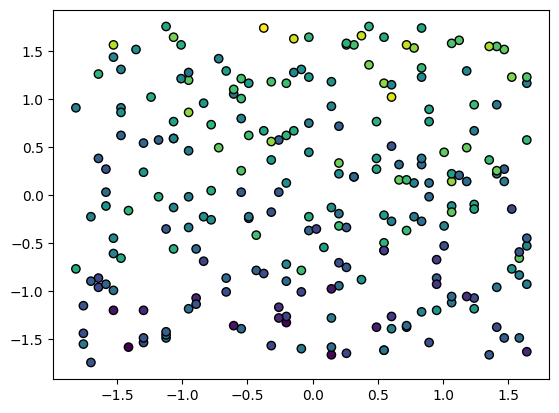

In [83]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
plt.show()

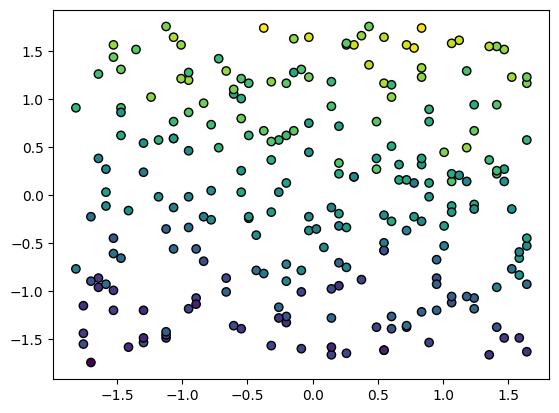

In [84]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_prediction_1, edgecolors="k")
plt.show()

In [85]:
Model_2.intercept_

array([20.57631355])

In [86]:
Model_2.support_

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [87]:
Model_2.dual_coef_

array([[-0.1       ,  0.1       ,  0.1       ,  0.1       , -0.1       ,
         0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       , -0.1       , -0.1       , -0.1       ,  0.1       ,
        -0.1       , -0.1       , -0.1       , -0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ,  0.1       , -0.1       ,
         0.1       , -0.1       , -0.1       , -0.1       ,  0.1       ,
        -0.1       , -0.1       ,  0.1       , -0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       , -0.1       , -0.1       ,
        -0.1       ,  0.1       ,  0.1       , -0.1       , -0.1       ,
         0.1       , -0.1       ,  0.1       ,  0.1       , -0.1       ,
         0.1       , -0.1       ,  0.1       , -0.1       , -0.1       ,
        -0.1       ,  0.1       , -0.1       , -0.1       ,  0.1       ,
        -0.1       ,  0.1       , -0.1       , -0.1       , -0.1       ,
        -0.1       ,  0.1       ,  0.1       ,  0.1

# Your Excersice: DT & Random Forest

## Decision Tree for classification


In [92]:


Model_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, random_state=40)

# fit the model on train set
Model_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, random_state=40)

In [93]:
# Predict train set

y_train_prediction_1 = Model_1.predict(X_train)
y_train_prediction_1

array([18.4726087 , 22.50287671, 22.50287671, 20.69821918, 17.6105    ,
       16.10741935, 22.50287671, 26.352     , 22.50287671, 17.6105    ,
       16.10741935, 20.69821918, 20.69821918, 17.6105    , 18.4726087 ,
       16.10741935, 18.4726087 , 22.50287671, 17.6105    , 20.69821918,
       22.50287671, 20.69821918, 20.69821918, 18.4726087 , 22.50287671,
       20.69821918, 16.10741935, 20.69821918, 20.69821918, 18.4726087 ,
       16.10741935, 22.50287671, 20.69821918, 20.69821918, 22.50287671,
       22.50287671, 20.69821918, 17.6105    , 20.69821918, 20.69821918,
       20.69821918, 20.69821918, 18.4726087 , 17.6105    , 20.69821918,
       16.10741935, 22.50287671, 22.50287671, 20.69821918, 20.69821918,
       22.50287671, 22.50287671, 22.50287671, 20.69821918, 20.69821918,
       22.50287671, 26.352     , 20.69821918, 18.4726087 , 17.6105    ,
       17.6105    , 20.69821918, 22.50287671, 20.69821918, 16.10741935,
       20.69821918, 16.10741935, 17.6105    , 17.6105    , 22.50

In [94]:
#Predict test set

y_test_prediction_1 = Model_1.predict(X_test)

In [96]:
# print the scores on training and test set

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print('Training MAE: {:.2f}'.format(mean_absolute_error(y_train, y_train_prediction_1)))
print('Training MSE: {:.2f}'.format(mean_squared_error(y_train, y_train_prediction_1)))
print('Training RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_prediction_1))))
print('Training R2: {:.2f}'.format(r2_score(y_train, y_train_prediction_1)))

print('\nTest MAE: {:.2f}'.format(mean_absolute_error(y_test, y_test_prediction_1)))
print('Test MSE: {:.2f}'.format(mean_squared_error(y_test, y_test_prediction_1)))
print('Test RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_test_prediction_1))))
print('Test R2: {:.2f}'.format(r2_score(y_test, y_test_prediction_1)))

Training MAE: 2.36
Training MSE: 7.92
Training RMSE: 2.81
Training R2: 0.49

Test MAE: 2.93
Test MSE: 11.48
Test RMSE: 3.39
Test R2: 0.08


In [98]:
# Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_prediction_1)
mse = mean_squared_error(y_test, y_test_prediction_1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_prediction_1)

# Create a DataFrame for the Decision Tree results
dt_results = pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)},
                                  index = ['Decision Tree Normal'])

# Concatenate with the existing Results DataFrame if it exists, otherwise create it
if 'Results' in locals() or 'Results' in globals():
    Results = pd.concat([Results, dt_results])
else:
    Results = dt_results

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288
Decision Tree Normal,2.93,11.48,3.39,0.082


In [100]:
# Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_prediction_1)
mse = mean_squared_error(y_test, y_test_prediction_1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_prediction_1)

# Create a DataFrame for the Decision Tree results
dt_results_final = pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)},
                                  index = ['Decision Tree - Final'])

# Concatenate with the existing Results DataFrame
if 'Results' in locals() or 'Results' in globals():
    Results = pd.concat([Results, dt_results_final])
else:
    Results = dt_results_final

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288
Decision Tree Normal,2.93,11.48,3.39,0.082
Decision Tree - Final,2.93,11.48,3.39,0.082


### Grid Search for parameter turning for Decsion Tree

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor # Changed from DecisionTreeClassifier

params = {'max_depth':range(3,15),
          'max_features':['sqrt', 'log2']}

DT_search = GridSearchCV(DecisionTreeRegressor(), params, cv=10) # Changed from DecisionTreeClassifier()

DT_search.fit(X_train, y_train)
DT_search.best_params_

{'max_depth': 3, 'max_features': 'log2'}

In [107]:
from sklearn.tree import DecisionTreeRegressor # Import the regressor

Model_2 = DecisionTreeRegressor(criterion='squared_error', # 'mse' is a common criterion for regression trees; 'gini' is for classification
                                 max_depth=DT_search.best_params_['max_depth'],
                                 max_features=DT_search.best_params_['max_features'],
                                 random_state=40)

# fit the model on train set
Model_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2', random_state=40)

In [109]:
#Predict test set
y_test_prediction_2 = Model_2.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_prediction_2)
mse = mean_squared_error(y_test, y_test_prediction_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_prediction_2)

# Create a DataFrame for the Decision Tree results
dt_tuned_results = pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)},
                                  index = ['Decision Tree - Tuned'])

# Concatenate with the existing Results DataFrame
if 'Results' in locals() or 'Results' in globals():
    Results = pd.concat([Results, dt_tuned_results])
else:
    Results = dt_tuned_results

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288
Decision Tree Normal,2.93,11.48,3.39,0.082
Decision Tree - Final,2.93,11.48,3.39,0.082
Decision Tree - Tuned,3.13,13.56,3.68,-0.083


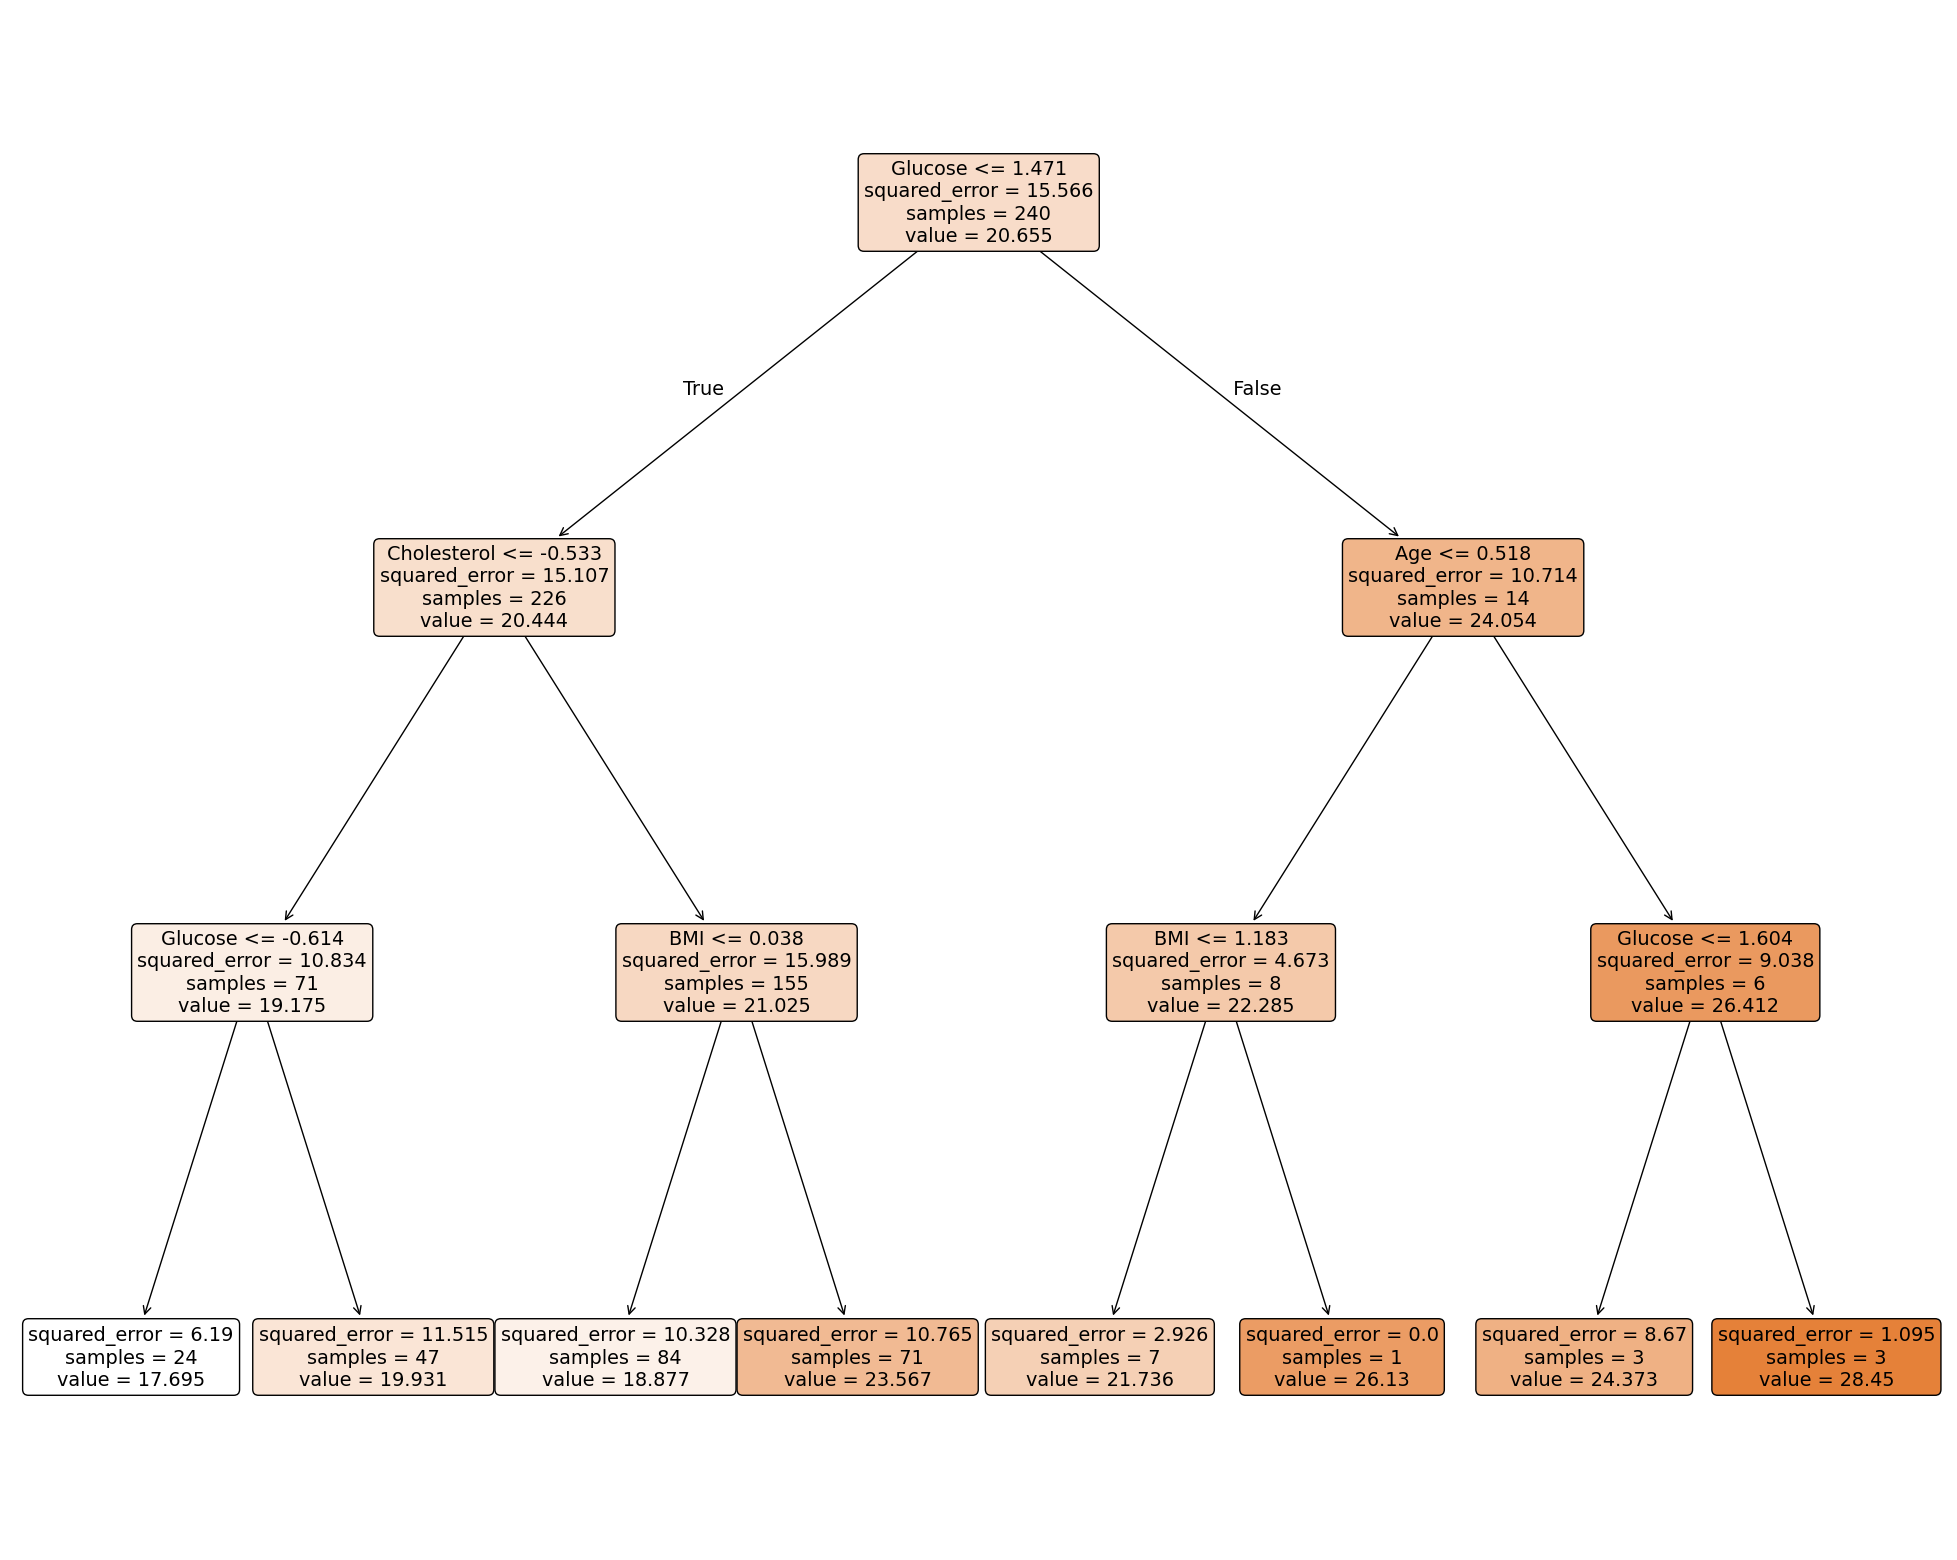

In [111]:
from sklearn.tree import plot_tree

# X_train was converted to a numpy array after scaling, so use the original dataframe columns
feature_names = df.drop('Disease_Risk', axis=1).columns.tolist()

plt.figure(figsize = (25, 20))
plot_tree(Model_2, feature_names = feature_names, filled=True, rounded=True)
plt.show()

In [112]:
path=Model_2.cost_complexity_pruning_path(X_train,y_train)
alpha_grid=path['ccp_alphas']
alpha_grid

array([0.        , 0.07040012, 0.10387007, 0.24327683, 0.33123406,
       1.64564203])

In [113]:
DT_search.best_params_

{'max_depth': 3, 'max_features': 'log2'}

In [115]:
#K-fold cross validation to choose the best model

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor # Import the regressor

CV = np.zeros(shape = len(alpha_grid)) #to save cv results

for i in range(len(alpha_grid)):
    DT = DecisionTreeRegressor(max_depth=DT_search.best_params_['max_depth'],
                                max_features=DT_search.best_params_['max_features'],
                                random_state=40,
                                ccp_alpha = alpha_grid[i])

    scores = cross_val_score(estimator = DT,
                             X = X_train,
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error', # Changed scoring to a regression metric
                             cv = 5, n_jobs = -1)
    CV[i] = scores.mean()

In [116]:
#Best alpha
best_alpha = alpha_grid[np.argmax(CV)]
best_alpha

np.float64(0.10387006944444438)

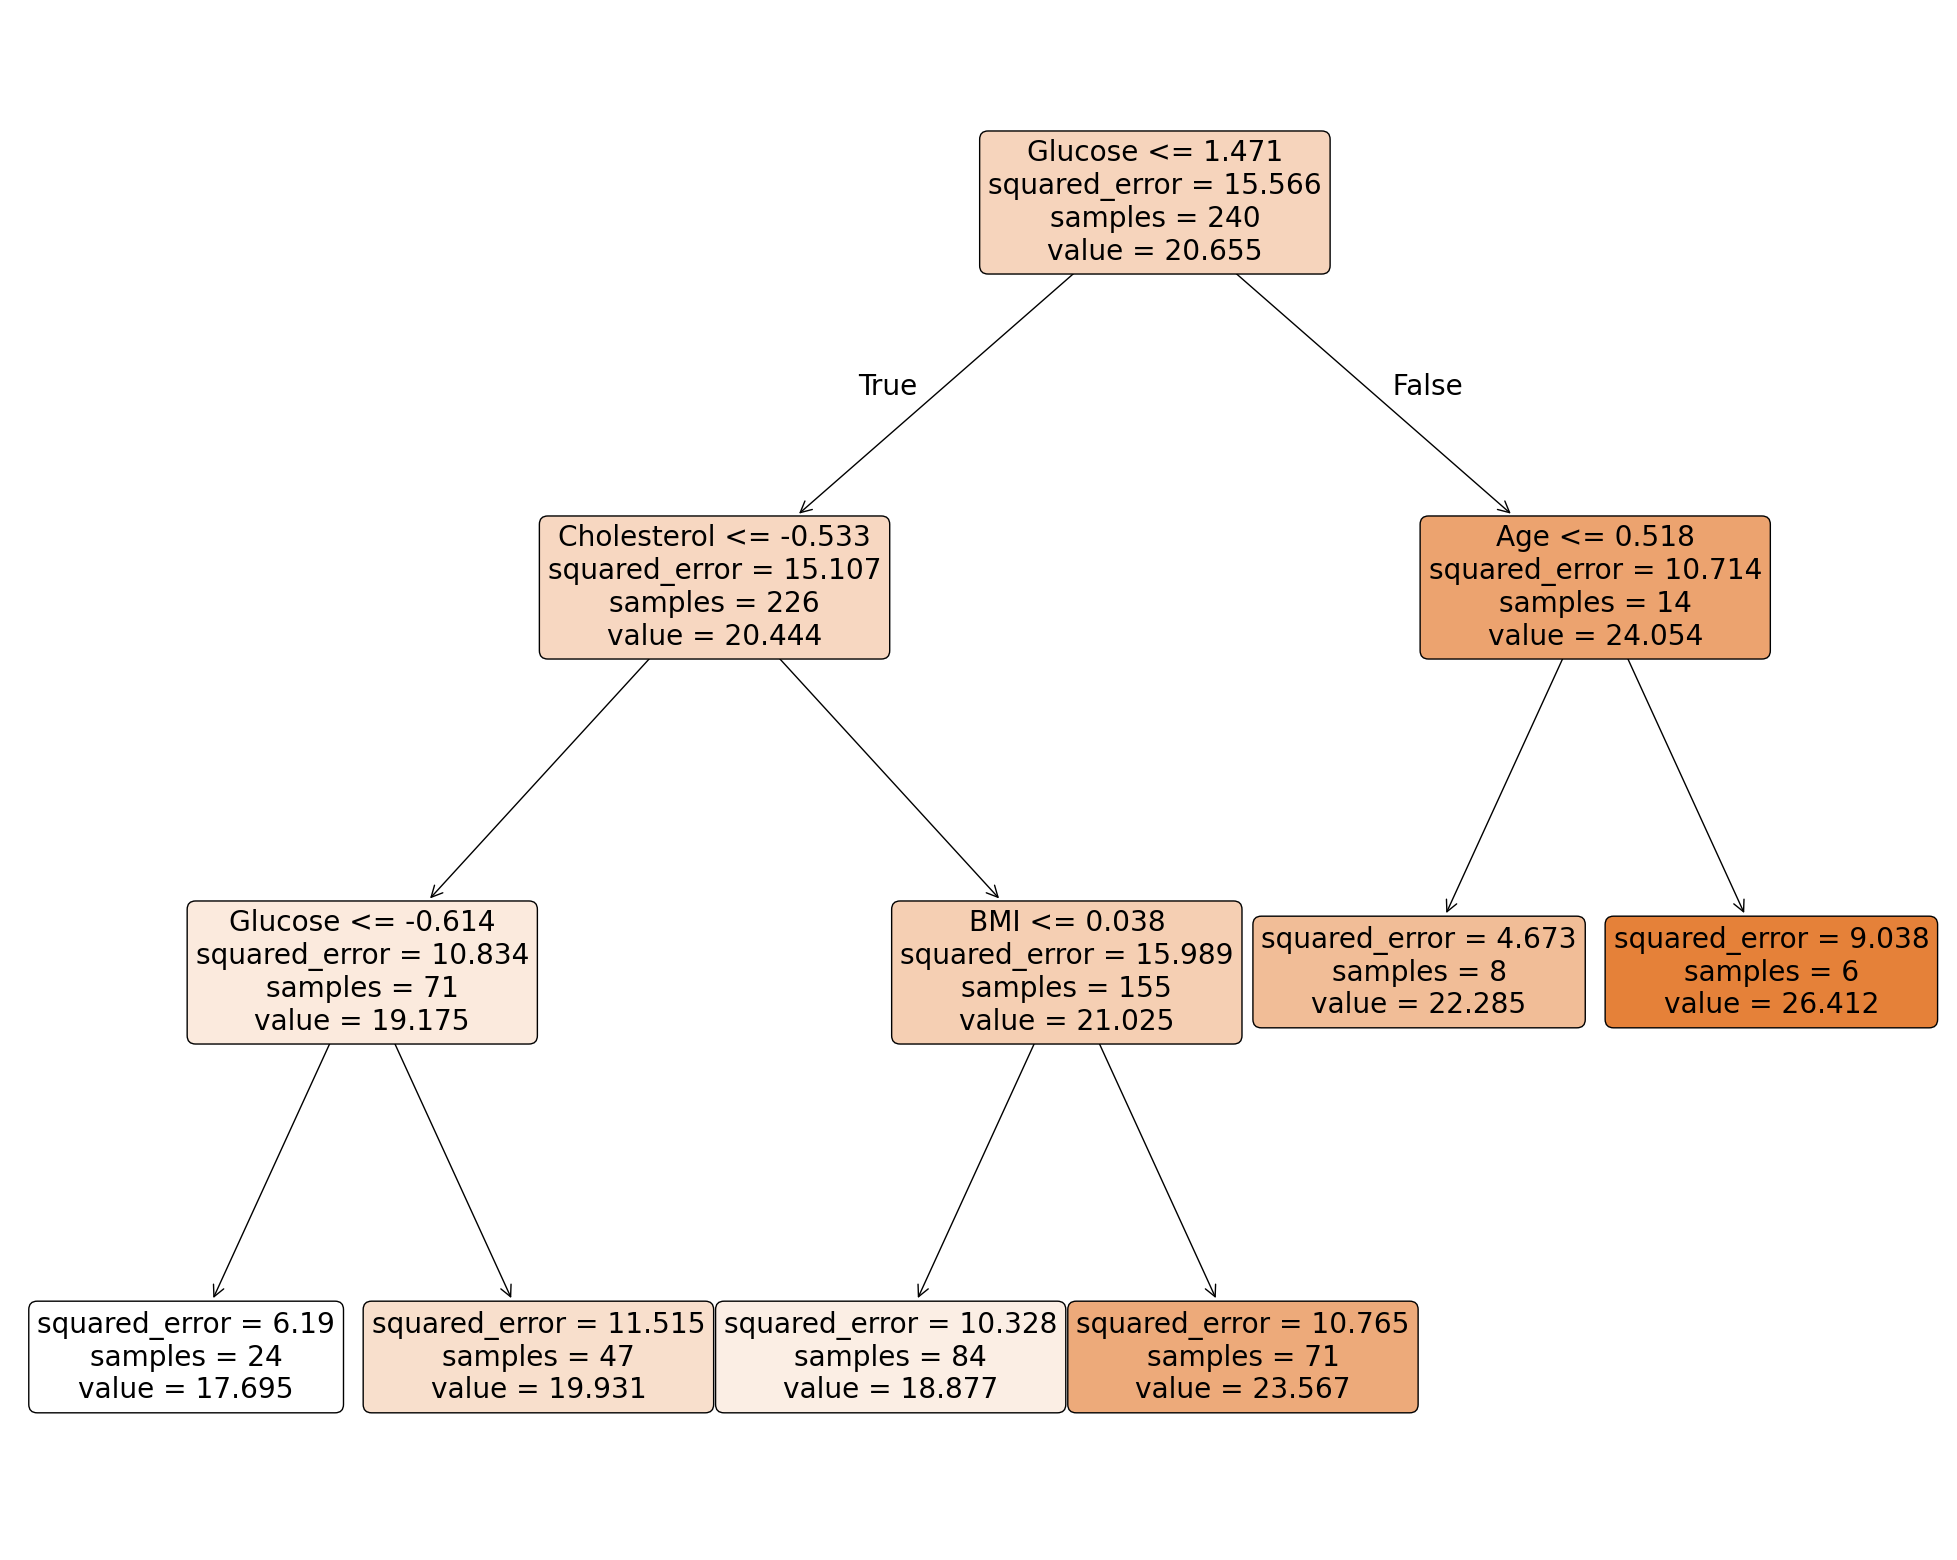

In [118]:
from sklearn.tree import DecisionTreeRegressor # Import the regressor

Model_3 = DecisionTreeRegressor(max_depth=DT_search.best_params_['max_depth'],
                                 max_features=DT_search.best_params_['max_features'],
                                 random_state=40,
                                 ccp_alpha = best_alpha)
Model_3.fit(X_train,y_train)

plt.figure(figsize = (25, 20))
# X_train is a numpy array after scaling, use the precomputed feature_names list
plot_tree(Model_3, feature_names = feature_names, filled=True, rounded=True)
plt.show()

In [120]:
y_test_prediction_3 = Model_3.predict(X_test)

# Calculate regression metrics
mae = metrics.mean_absolute_error(y_test, y_test_prediction_3)
mse = metrics.mean_squared_error(y_test, y_test_prediction_3)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_test_prediction_3)

Results = pd.concat([Results,
                     pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)},
                                  index = ['Decision Tree - Tuned & Pruned'])])

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288
Decision Tree Normal,2.93,11.48,3.39,0.082
Decision Tree - Final,2.93,11.48,3.39,0.082
Decision Tree - Tuned,3.13,13.56,3.68,-0.083
Decision Tree - Tuned & Pruned,3.16,13.94,3.73,-0.114


## Random Forest for Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor # Changed to Regressor

Model_4 = RandomForestRegressor(n_estimators = 200,
                                 max_features = 4,
                                 criterion = 'squared_error', # Changed criterion for regression
                                 max_depth = 10,
                                 min_samples_leaf = 15,
                                 random_state = 1)

#Fit the model on the train set
Model_4.fit(X_train, y_train) # Use X_train after scaling for consistency

#Predict for test set (changed to test set for evaluation)
y_test_prediction_4 = pd.Series(Model_4.predict(X_test))
y_test_prediction_4

,0
0,24.606626
1,23.888080
2,18.057850
3,20.338996
4,16.994538
5,16.374675
6,24.833147
7,22.554194
8,23.881871
9,21.198462


In [124]:
#Predict test set
y_test_prediction_4 = Model_4.predict(X_test)

# Calculate regression metrics
mae = metrics.mean_absolute_error(y_test, y_test_prediction_4)
mse = metrics.mean_squared_error(y_test, y_test_prediction_4)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_test_prediction_4)

Results = pd.concat([Results,
                     pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)},
                                  index = ['Random Forest - Not Tuned'])])

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288
Decision Tree Normal,2.93,11.48,3.39,0.082
Decision Tree - Final,2.93,11.48,3.39,0.082
Decision Tree - Tuned,3.13,13.56,3.68,-0.083
Decision Tree - Tuned & Pruned,3.16,13.94,3.73,-0.114
Random Forest - Not Tuned,2.76,9.67,3.11,0.227


In [126]:
tuned_para={
    'n_estimators': range(50,200,25),
    'max_depth':range(3,7),
    'max_features':['sqrt', 'log2'] # Removed 'auto' as it's deprecated/invalid for RandomForestRegressor tuning in some contexts
}

Forest_search = GridSearchCV(RandomForestRegressor(random_state = 1),tuned_para,cv=10) # Changed to RandomForestRegressor

Forest_search.fit(X_train, y_train)
Forest_search.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}

In [128]:
from sklearn.ensemble import RandomForestRegressor # Changed from RandomForestClassifier

Model_5 = RandomForestRegressor(n_estimators = Forest_search.best_params_['n_estimators'],
                                 max_features = Forest_search.best_params_['max_features'],
                                 criterion = 'squared_error', # Changed criterion for regression
                                 max_depth = Forest_search.best_params_['max_depth'],
                                 min_samples_leaf = 15,
                                 random_state = 1)
# fit the model on train set
Model_5.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=15,
                      random_state=1)

In [130]:
#Predict test set
y_test_prediction_5 = Model_5.predict(X_test)

# Import necessary regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_prediction_5)
mse = mean_squared_error(y_test, y_test_prediction_5)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_prediction_5)

Results = pd.concat([Results,
                     pd.DataFrame({'MAE': round(mae, 2),
                                   'MSE': round(mse, 2),
                                   'RMSE': round(rmse, 2),
                                   'R2': round(r2, 3)
                                  },
                                  index = ['Random Forest - Tuned'])])

Results

,MAE,MSE,RMSE,R2
SVM - Tuned,2.65,9.42,3.07,0.247
SVR - Tuned GridSearch,2.53,8.92,2.99,0.288
Decision Tree Normal,2.93,11.48,3.39,0.082
Decision Tree - Final,2.93,11.48,3.39,0.082
Decision Tree - Tuned,3.13,13.56,3.68,-0.083
Decision Tree - Tuned & Pruned,3.16,13.94,3.73,-0.114
Random Forest - Not Tuned,2.76,9.67,3.11,0.227
Random Forest - Tuned,2.56,8.93,2.99,0.286
